In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./kerala criminal cases  - crimes  accidents.csv")

df.head()

,Sl.No,Crime Heads,2016,2017,2018,2019,2020,2021,2022 (Up to Aug)
0,1,Murder,305,305,292,323,306,337,190
1,2,Attempt to commit murder,622,583,672,729,610,606,396
2,3,CH not amounting to murder,132,112,90,93,84,55,52
3,4,Rape,1656,2003,2005,2023,1880,2318,1383
4,5,Kidnapping & abduction,241,293,297,386,307,358,237


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl.No             69 non-null     int64 
 1   Crime Heads       69 non-null     object
 2   2016              69 non-null     int64 
 3   2017              69 non-null     int64 
 4   2018              69 non-null     int64 
 5   2019              69 non-null     int64 
 6   2020              69 non-null     int64 
 7   2021              69 non-null     int64 
 8   2022 (Up to Aug)  69 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 5.0+ KB


In [4]:
df.isnull().sum()

Sl.No               0
Crime Heads         0
2016                0
2017                0
2018                0
2019                0
2020                0
2021                0
2022 (Up to Aug)    0
dtype: int64

In [5]:
print(f'Number of Crime Head : {df["Crime Heads"].nunique()}\n\n Crime Heads List : \n{df["Crime Heads"].unique()}')

Number of Crime Head : 67

 Crime Heads List : 
['Murder' 'Attempt to commit murder' 'CH not amounting to murder' 'Rape'
 'Kidnapping & abduction' 'Dacoity' 'Robbery' 'Burglary' 'Theft' 'Riots'
 'Criminal breach of trust' 'Cheating' 'Counterfeiting' 'Arson' 'Hurt'
 'Dowry Deaths(304(B) IPC)' 'Molestation' 'Sexual harassment'
 'Cruelty by husband or relatives' 'Other IPC Crimes' 'Arms Act'
 'NDPS Act' 'Gambling ACT' 'Abkari ACT'
 'Explosive and Explosive Substance Act' 'Immoral Traffic(P) Act'
 'Railways Act' 'Registration of foreigners Act'
 'Protection of Civil Rights Act' 'Indian Passport Act'
 'Essential Commodities Act' 'Antiquity and art treasure Act'
 'Dowry Prohibition Act' 'Prohibition of Child Marriage Act'
 'Indecent rep. of women Act' 'SC/ST (POA) Act' 'Forest Act'
 'Other SLL Crimes' 'Total Murder (Infanticide and Other)'
 'Section 4 & 6 of PoCSO Act with Sec. 376 IPC' 'Kidnapping and Abduction'
 'Foeticide' 'Abetment of Suicide' 'Exposure and Abandonment'
 'Procuration of 

In [6]:
df = df.rename(columns = {"2022 (Up to Aug)" : "2022"})

df.columns

Index(['Sl.No', 'Crime Heads', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

In [7]:
df = df.drop(columns = ["Sl.No"])
df.head()

,Crime Heads,2016,2017,2018,2019,2020,2021,2022
0,Murder,305,305,292,323,306,337,190
1,Attempt to commit murder,622,583,672,729,610,606,396
2,CH not amounting to murder,132,112,90,93,84,55,52
3,Rape,1656,2003,2005,2023,1880,2318,1383
4,Kidnapping & abduction,241,293,297,386,307,358,237


In [8]:
df_long = df.melt(
    id_vars = ["Crime Heads"],
    var_name = "Years",
    value_name = "Crime_Counts"
)

df_long.head()

,Crime Heads,Years,Crime_Counts
0,Murder,2016,305
1,Attempt to commit murder,2016,622
2,CH not amounting to murder,2016,132
3,Rape,2016,1656
4,Kidnapping & abduction,2016,241


In [9]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Crime Heads   483 non-null    object
 1   Years         483 non-null    object
 2   Crime_Counts  483 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.4+ KB


In [10]:
df_long["Years"] = df_long["Years"].astype("int")
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Crime Heads   483 non-null    object
 1   Years         483 non-null    int64 
 2   Crime_Counts  483 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.4+ KB


In [11]:
df_long = df_long.sort_values(
    by = ["Crime Heads", "Years"]).reset_index(drop = True)

df_long.head()

,Crime Heads,Years,Crime_Counts
0,Abetment of Suicide,2016,3
1,Abetment of Suicide,2017,4
2,Abetment of Suicide,2018,6
3,Abetment of Suicide,2019,0
4,Abetment of Suicide,2020,3


In [12]:
total_cases = df_long.groupby("Years")["Crime_Counts"].sum().reset_index()

total_cases

,Years,Crime_Counts
0,2016,1060810
1,2017,937161
2,2018,750442
3,2019,672455
4,2020,693885
5,2021,726966
6,2022,384745


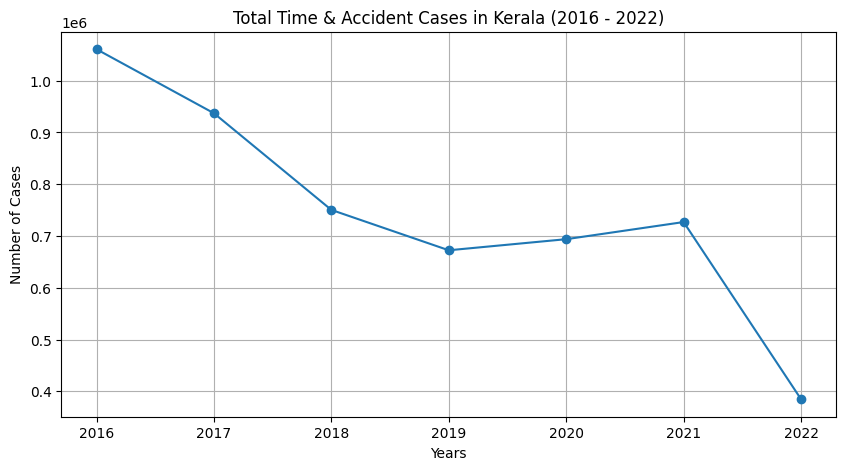

In [13]:
plt.figure(figsize = (10, 5))
plt.plot(
    total_cases["Years"], 
    total_cases["Crime_Counts"], 
    marker = "o"
)

plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

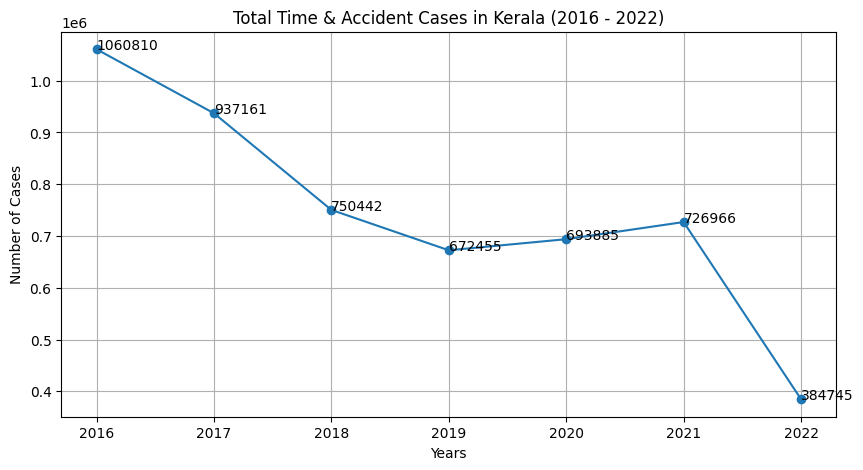

In [14]:
plt.figure(figsize = (10, 5))
plt.plot(
    total_cases["Years"], 
    total_cases["Crime_Counts"], 
    marker = "o"
)

for i in range(len(total_cases)):
    plt.text(
        total_cases["Years"][i],
        total_cases["Crime_Counts"][i],
        str(total_cases["Crime_Counts"][i]),  #converts the crime count number into a string to display as text on the plot.
        ha = 'left',
        va = 'baseline'
    )
    

plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

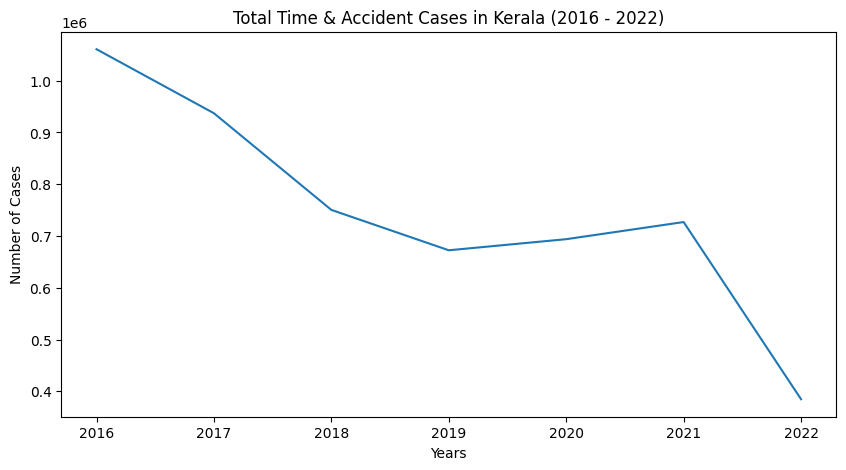

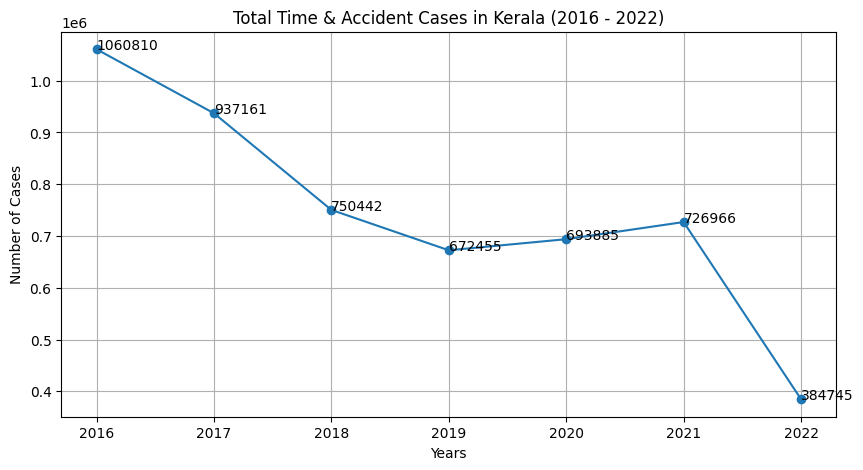

In [15]:
plt.figure(figsize = (10, 5))
plt.plot(
    total_cases["Years"], 
    total_cases["Crime_Counts"], 
)
plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.show()

plt.figure(figsize = (10, 5))
plt.plot(
    total_cases["Years"], 
    total_cases["Crime_Counts"], 
    marker = "o"
)

for i in range(len(total_cases)):
    plt.text(
        total_cases["Years"][i],
        total_cases["Crime_Counts"][i],
        str(total_cases["Crime_Counts"][i]),  #converts the crime count number into a string to display as text on the plot.
        ha = 'left',
        va = 'baseline'
    )
    

plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

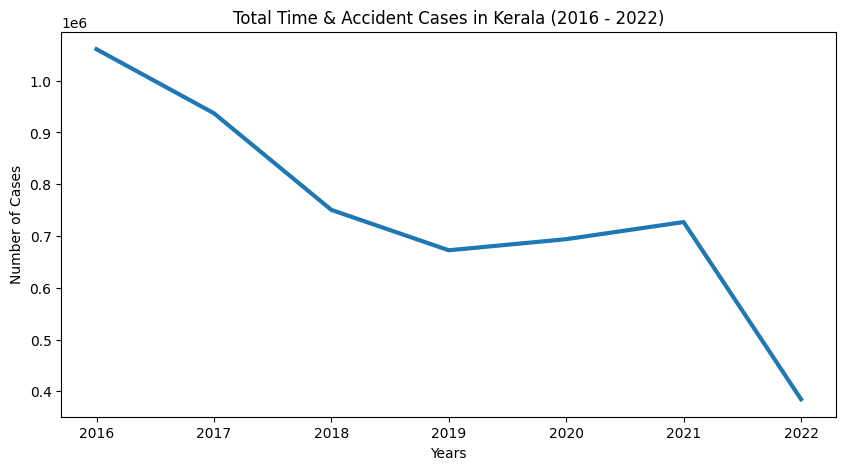

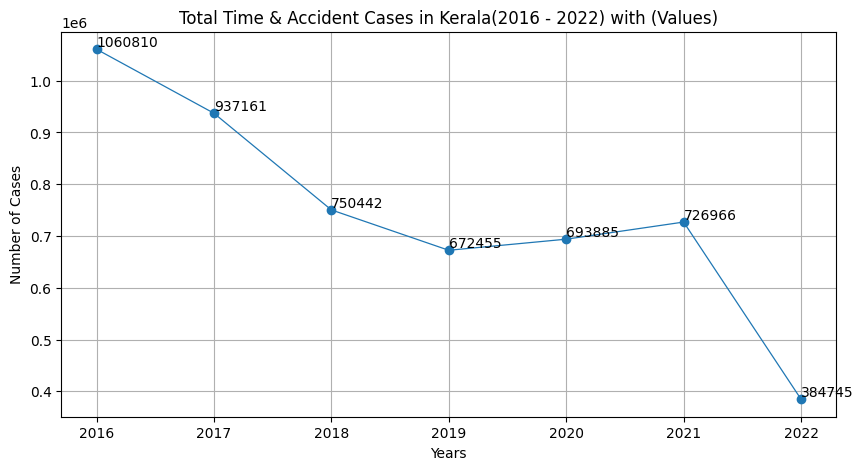

In [78]:
# -------- Graph 1: Trend line only --------
plt.figure(figsize=(10, 5))
plt.plot(total_cases["Years"], total_cases["Crime_Counts"],
    linewidth=3
)

plt.title("Total Time & Accident Cases in Kerala (2016 - 2022)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.show()


# -------- Graph 2: Line with markers and values --------
plt.figure(figsize=(10, 5))
plt.plot(total_cases["Years"], total_cases["Crime_Counts"],
    marker="o",
    linewidth=0.9
)

# Add value labels to each point
for year, count in zip(total_cases["Years"], total_cases["Crime_Counts"]):
    plt.text(year, count, str(count), #converts the crime count number into a string to display as text on the plot.
        ha="left",
        va="bottom"
    )

plt.title("Total Time & Accident Cases in Kerala(2016 - 2022) with (Values)")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

In [17]:
crimes = df_long.groupby("Crime Heads")["Crime_Counts"].sum().sort_values(ascending = False).reset_index()

crimes

,Crime Heads,Crime_Counts
0,Other SLL Crimes,2060689
1,Other IPC Crimes,988941
2,Cigarettes and Other Tobacco -Section 4,770631
3,Total Injuries in accidents,277560
4,No. of accidents,245853
...,...,...
62,Foeticide,1
63,Protection of Civil Rights Act,1
64,Antiquity and art treasure Act,1
65,Selling Girls for Prostitution,0


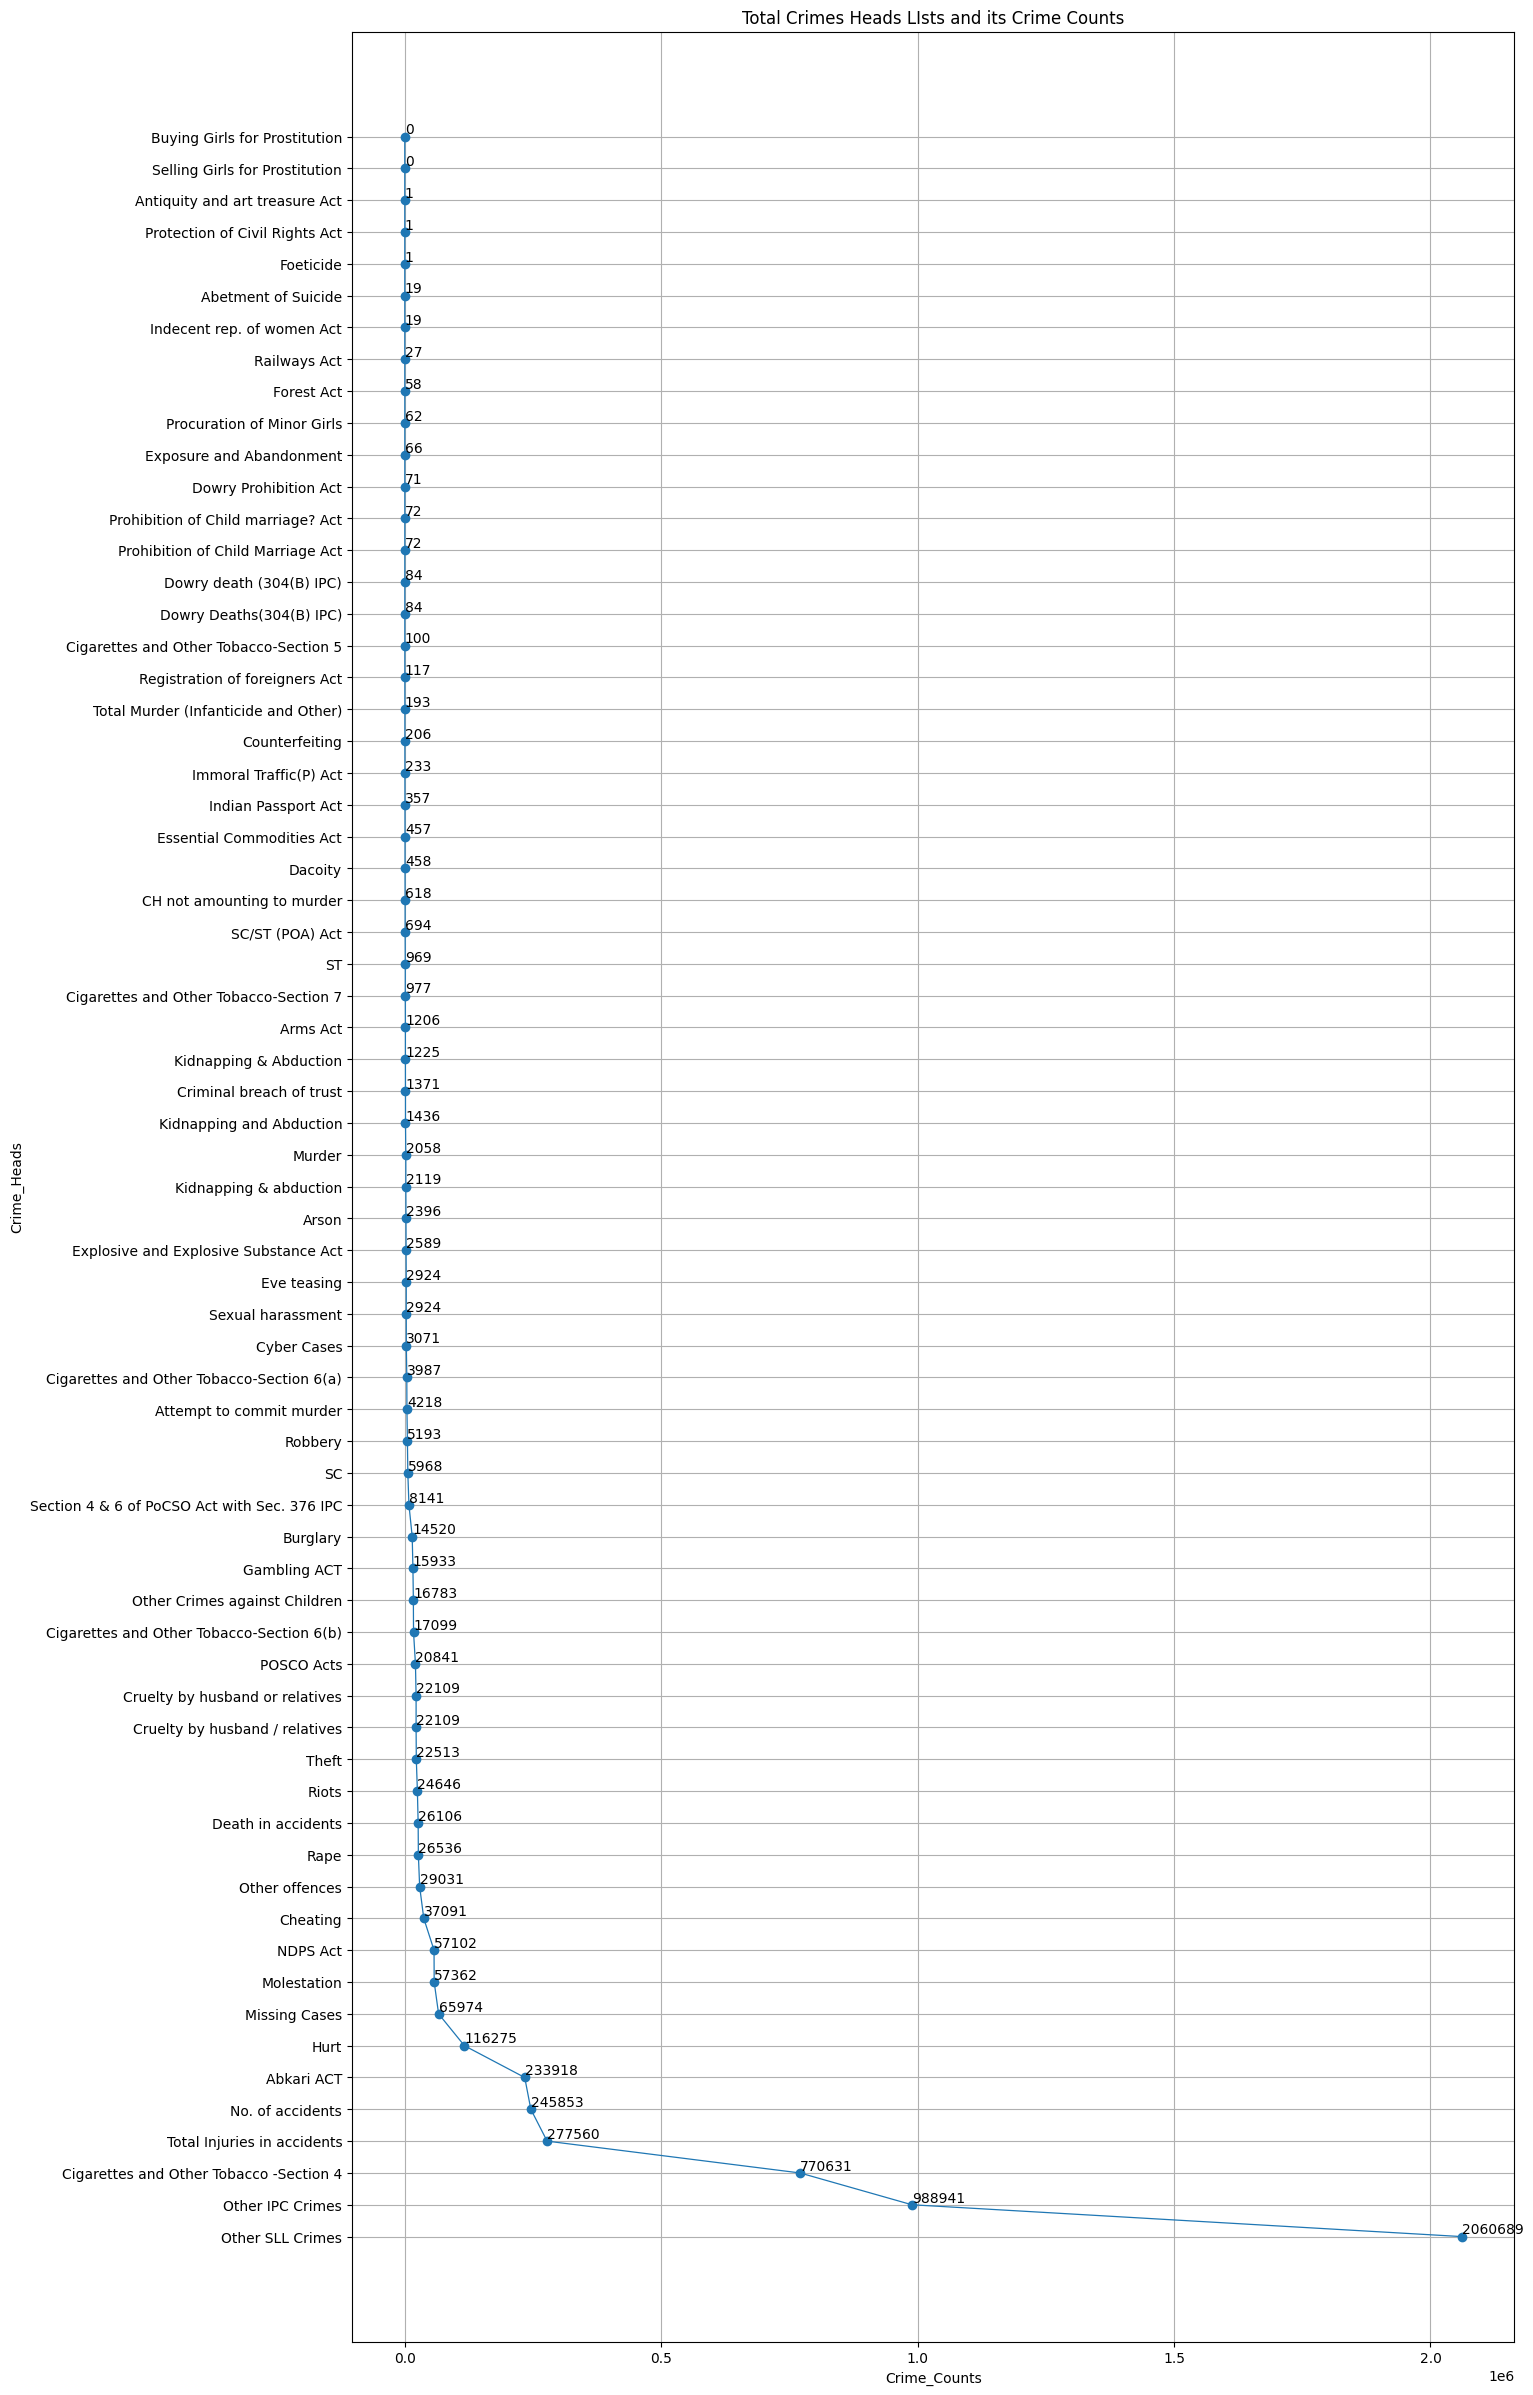

In [20]:
plt.figure(figsize=(15, 30))
plt.plot(crimes["Crime_Counts"], crimes["Crime Heads"],
    marker="o",
    linewidth=0.9
)

# Add value labels to each point
for Crime_Counts, Crime_Heads in zip(crimes["Crime_Counts"], crimes["Crime Heads"]):
    plt.text(Crime_Counts, Crime_Heads, str(Crime_Counts), #converts the crime count number into a string to display as text on the plot.
        ha="left",
        va="bottom"
    )

plt.title("Total Crimes Heads LIsts and its Crime Counts")
plt.xlabel("Crime_Counts")
plt.ylabel("Crime_Heads")
plt.grid(True)
plt.show()

In [19]:
top_crimes = df_long.groupby("Crime Heads")["Crime_Counts"].sum().sort_values(ascending = False).head(6)

top_crimes.reset_index()

,Crime Heads,Crime_Counts
0,Other SLL Crimes,2060689
1,Other IPC Crimes,988941
2,Cigarettes and Other Tobacco -Section 4,770631
3,Total Injuries in accidents,277560
4,No. of accidents,245853
5,Abkari ACT,233918


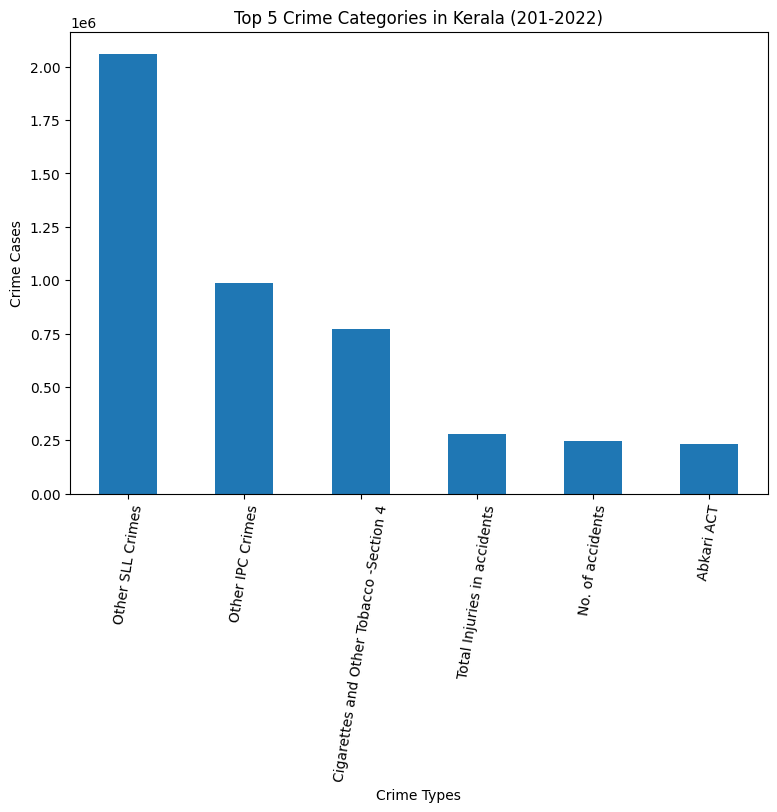

In [33]:
plt.figure(figsize = (9, 6))
top_crimes.plot(kind = "bar")

plt.title("Top 5 Crime Categories in Kerala (201-2022)")
plt.xlabel("Crime Types")
plt.xticks(rotation = 81)
plt.ylabel("Crime Cases")
plt.show()

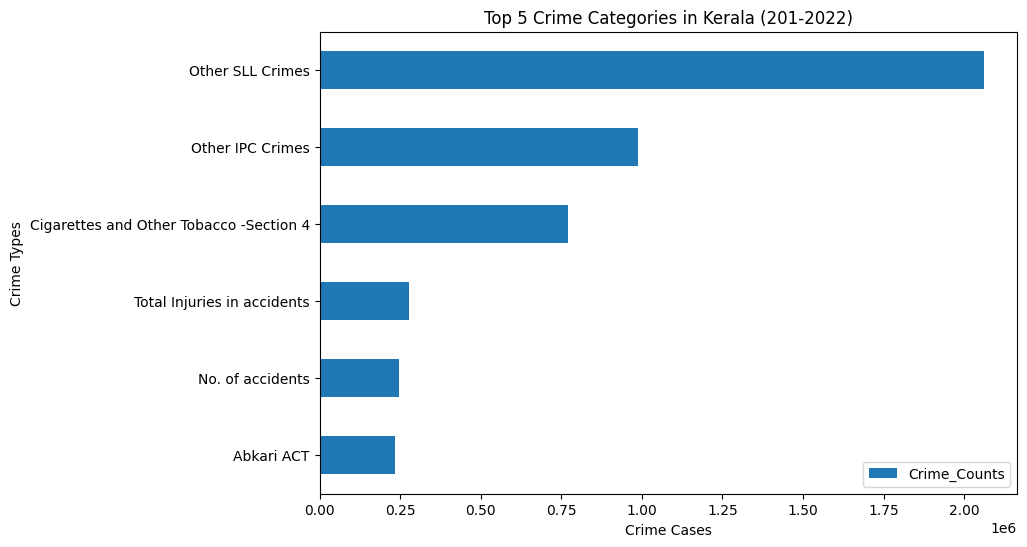

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))

top_crimes.plot(kind="barh", x="Crime_Counts", y="Crime Heads", legend=True)

plt.title("Top 5 Crime Categories in Kerala (201-2022)")
plt.xlabel("Crime Cases")
plt.xticks(rotation=0)  # Rotate labels at a more reasonable angle
plt.ylabel("Crime Types")

# REQUIRED to show biggest on top
plt.gca().invert_yaxis()
plt.show()


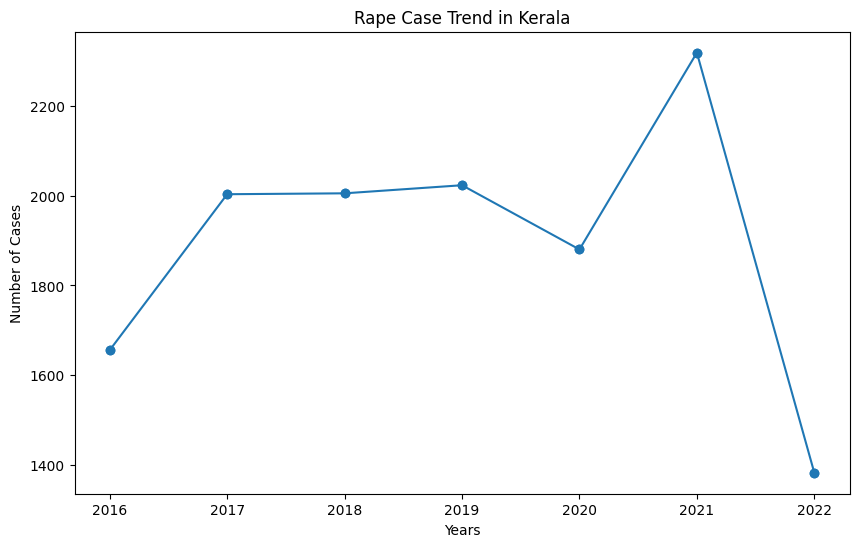

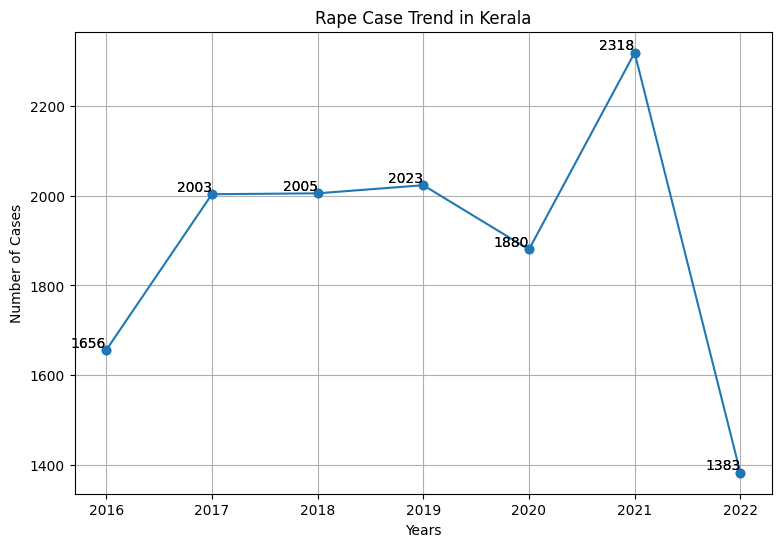

In [73]:
rape_data = df_long[df_long["Crime Heads"]=="Rape"]

plt.figure(figsize = (10, 6))
plt.plot(
    rape_data["Years"], rape_data["Crime_Counts"],
    marker = "o"
)

plt.title("Rape Case Trend in Kerala")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.show()

plt.figure(figsize = (9, 6))
plt.plot(
    rape_data["Years"], rape_data["Crime_Counts"],
    marker = "o"
)

for years, counts in zip(rape_data["Years"], rape_data["Crime_Counts"]):
    plt.text(years, counts, str(counts),
        ha="right",
        va="bottom"
        )

plt.title("Rape Case Trend in Kerala")
plt.xlabel("Years")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

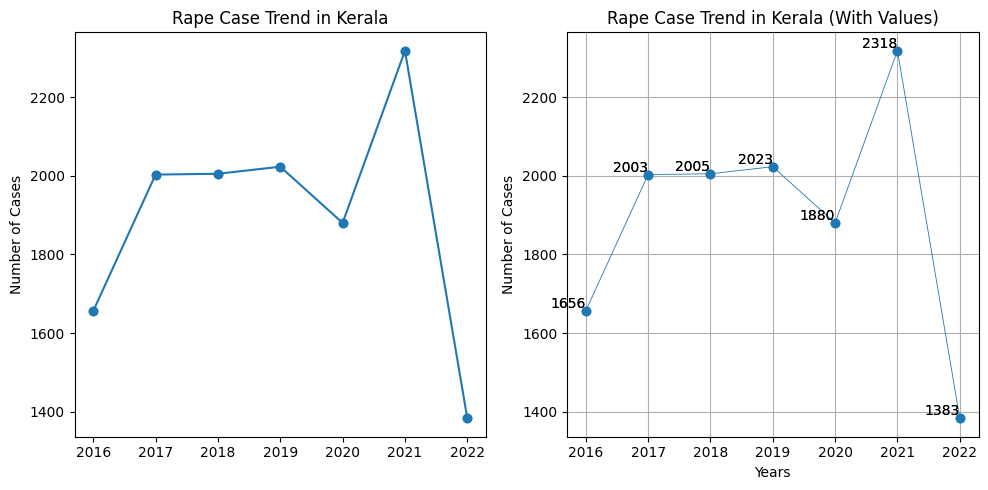

In [77]:
rape_data = df_long[df_long["Crime Heads"]=="Rape"]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = True)
# ----------------- Plot 1: Simple line plot -----------------
axes[0].plot(
    rape_data["Years"],
    rape_data["Crime_Counts"],
    marker="o"
)

axes[0].set_title("Rape Case Trend in Kerala")
axes[0].set_ylabel("Number of Cases")
axes[0].grid(False)

# ----------------- Plot 2: Line plot with value labels -----------------
axes[1].plot(
    rape_data["Years"],
    rape_data["Crime_Counts"],
    marker="o",
    linewidth=0.6
)

for year, count in zip(rape_data["Years"], rape_data["Crime_Counts"]):
    axes[1].text(
        year, count, str(count),
        ha="right",
        va="bottom"
    )

axes[1].set_title("Rape Case Trend in Kerala (With Values)")
axes[1].set_xlabel("Years")
axes[1].set_ylabel("Number of Cases")
axes[1].grid(True)

plt.tight_layout()
plt.show()

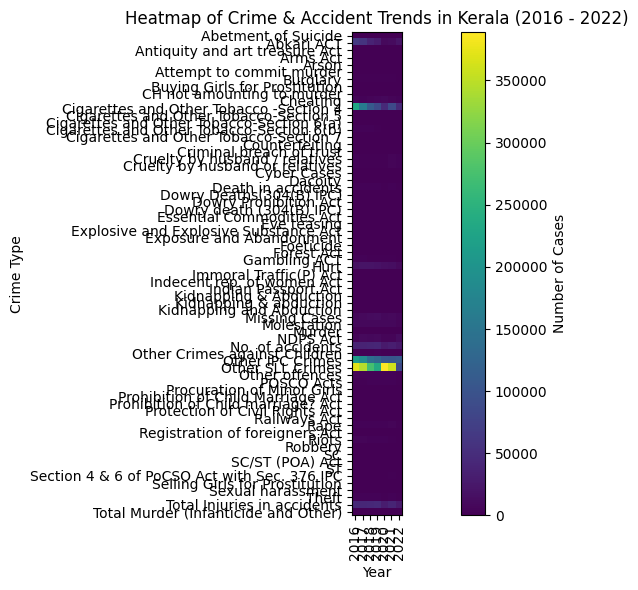

In [92]:
heatmap_data = df_long.pivot_table(index = "Crime Heads", columns = "Years", values = "Crime_Counts",
                                  aggfunc = "sum")

# Plot heatmap 
plt.figure(figsize = (12, 6))
plt.imshow(heatmap_data)

plt.title("Heatmap of Crime & Accident Trends in Kerala (2016 - 2022)")
plt.xlabel("Year")
plt.ylabel("Crime Type")

plt.xticks(
    range(len(heatmap_data.columns)), heatmap_data.columns, rotation = 90
)

plt.yticks(
    range(len(heatmap_data.index)), heatmap_data.index
)

plt.colorbar(label="Number of Cases")
plt.tight_layout()
plt.show()

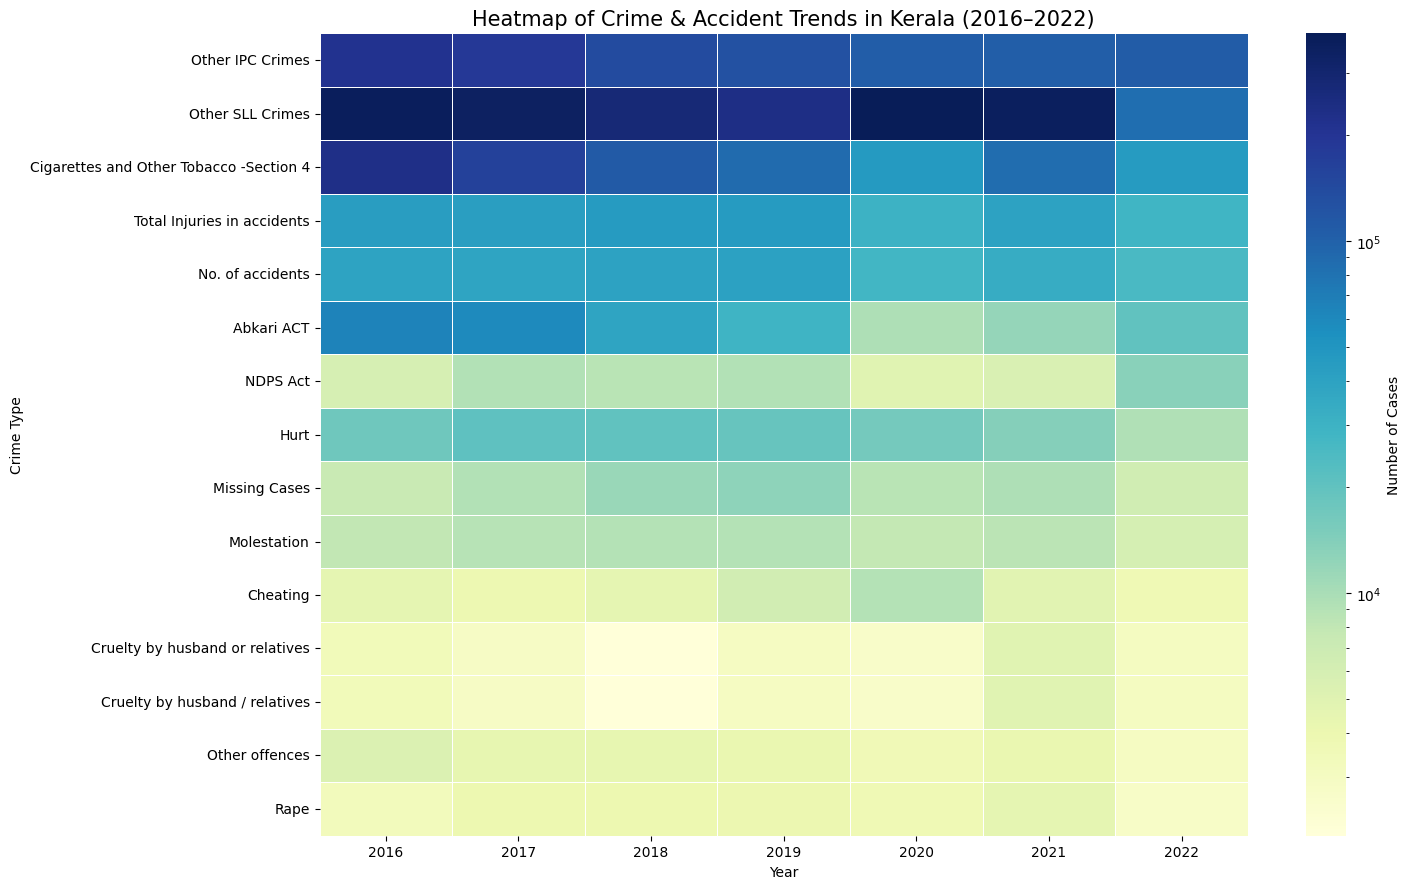

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Pivot table (same as yours)
heatmap_data = df_long.pivot_table(
    index="Crime Heads",
    columns="Years",
    values="Crime_Counts",
    aggfunc="sum"
)

# OPTIONAL but highly recommended: keep only top 15 crime types
heatmap_data = heatmap_data.sort_values(
    by=heatmap_data.columns[-1],
    ascending=False
).head(15)

# Plot seaborn heatmap
plt.figure(figsize=(15, 9))

sns.heatmap(
    heatmap_data,
    cmap="YlGnBu",
    linewidths=0.5,
    linecolor="white",
    norm=colors.LogNorm(),   # handles large value differences
    cbar_kws={"label": "Number of Cases"}
)

plt.title("Heatmap of Crime & Accident Trends in Kerala (2016–2022)", fontsize=15)
plt.xlabel("Year")
plt.ylabel("Crime Type")

plt.tight_layout()
plt.show()
